In [104]:
import niftiutils.helper_fxns as hf
import os
import shutil
import pandas as pd
import numpy as np
import pylab

import dicom2nifti
import dicom2nifti.compressed_dicom as compressed_dicom
%matplotlib inline

In [159]:
img_dir = r"D:\CBCT\Aaron"
dcm_path = img_dir+"\\15814.dcm"

In [160]:
dicom_input = compressed_dicom.read_file(dcm_path,
                                           defer_size=100,
                                           stop_before_pixels=False,
                                           force=False)

In [ ]:
dicom_input

In [162]:
cine_rate = float(dicom_input[('0018', '0040')].value)
kvp = float(dicom_input[('0018', '0060')].value)
d_detector = int(dicom_input[('0018', '1110')].value)
d_patient = int(dicom_input[('0018', '1111')].value)
t_exposure = int(dicom_input[('0018', '1150')].value)
current = int(dicom_input[('0018', '1151')].value)
exposure = int(dicom_input[('0018', '1152')].value)
pixel_spacing = dicom_input[('0018', '1164')].value
angle1 = float(dicom_input[('0018', '1510')].value)
angle2 = float(dicom_input[('0018', '1511')].value)
angle1_increment = dicom_input[('0018', '1520')].value
angle2_increment = dicom_input[('0018', '1521')].value
shutter_edges = [int(dicom_input[('0018', str(x))].value) for x in [1602, 1604, 1606, 1608]]

In [137]:
with open("angles.txt", 'w') as f:
    for a in angle1_increment:
        f.write(str(angle1+a)+"\n")

In [146]:
imgs = dicom_input[('7fe0', '0010')].value

In [145]:
rows = dicom_input[('0028', '0010')].value
cols = dicom_input[('0028', '0011')].value
ch = dicom_input[('0028', '0002')].value
frames = int(dicom_input[('0028', '0008')].value)

In [147]:
ls = list(dicom_input[('7fe0', '0010')].value)
img = [ls[x]+ls[x+1]*256 for x in range(0,len(ls),2)]
img = np.reshape(img,(frames,rows,cols))
recon_img = np.transpose(img, (2,1,0))[:,::-1,:]

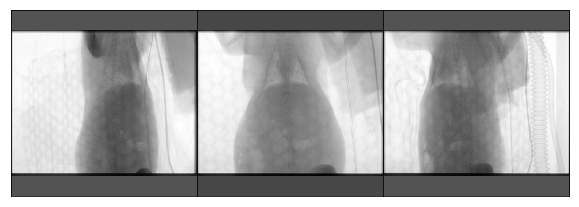

In [45]:
hf.draw_slices(canon_img,width=10)

In [155]:
recon_img = np.transpose(img, (1,0,2))[::-1,:,:]

In [157]:
recon_img.shape

(297, 384, 384)

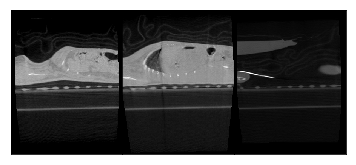

In [156]:
hf.draw_slices(recon_img)

In [51]:
import cphct

In [52]:
import pkgutil

In [58]:
package = cphct.cone
for importer, modname, ispkg in pkgutil.iter_modules(package.__path__):
    print ("Found submodule %s (is a package: %s)" % (modname, ispkg))

Found submodule cl (is a package: True)
Found submodule conf (is a package: False)
Found submodule cu (is a package: True)
Found submodule fdk (is a package: True)
Found submodule io (is a package: False)
Found submodule katsevich (is a package: True)
Found submodule npy (is a package: True)
Found submodule npycore (is a package: True)


In [111]:
canon_img.dtype

dtype('int32')

In [115]:
for slice_num in range(canon_img.shape[2]):
    with open("projections\\projection.%d.raw" % slice_num, 'wb') as f:
        f.write(canon_img[:,:,slice_num].copy(order='C'))

In [89]:
projection_path = r'C:\Users\Clinton\Documents\CBCT\circular\shepp-logan-8x32\input-8x32-auto-float32\shepp-logan_projections_curved_8x32_5.65685x4.34991_360_0.0_3.0_2.0x2.0x2.0_float32\projection.0.raw'

In [93]:
with open(projection_path, 'rb') as f:
    a = f.readlines()[0]

In [99]:
rows=8
cols=32

In [102]:
img = [a[x]+a[x+1]*256+a[x+2]*256**2+a[x+3]*256**3 for x in range(0,len(a),4)]
img = np.reshape(img,(rows,cols))

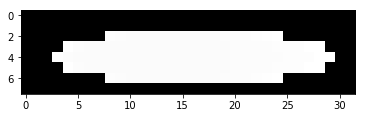

In [107]:
pylab.imshow(img, cmap='gray')

In [60]:
pylist = []

In [61]:
for root, dirs, files in os.walk('.\\cphcttoolbox-1.1.3'):
    for fn in files:
        if fn.endswith(".py"):
            pylist.append(os.path.join(root,fn))

In [62]:
import subprocess

In [65]:
for fn in pylist:
    subprocess.run(["python-modernize", "-w", fn])

In [66]:
s = 'circular/shepp-logan-%(detector_rows)sx%(detector_columns)s/input-%(detector_rows)sx%(detector_columns)s-auto-%(input_precision)s/raw-scene_360_%(detector_rows)s_%(detector_columns)s_0.000_%(x_max)s-%(source_distance)s_2.000_2.000_2.000_%(input_precision)s.csv'

In [72]:
conf = {}
conf['detector_rows'] = 8

In [81]:
while s.find("%(") != -1:
    substr = s[s.find("%(")+2:s.find(")s")]
    s = s.replace("%("+substr+")s", str(conf[substr]))

In [87]:
a = "lol%%d"

In [86]:
a % 46

'lol46'

In [88]:
a = a.replace("%%", "%")

'lol%d'